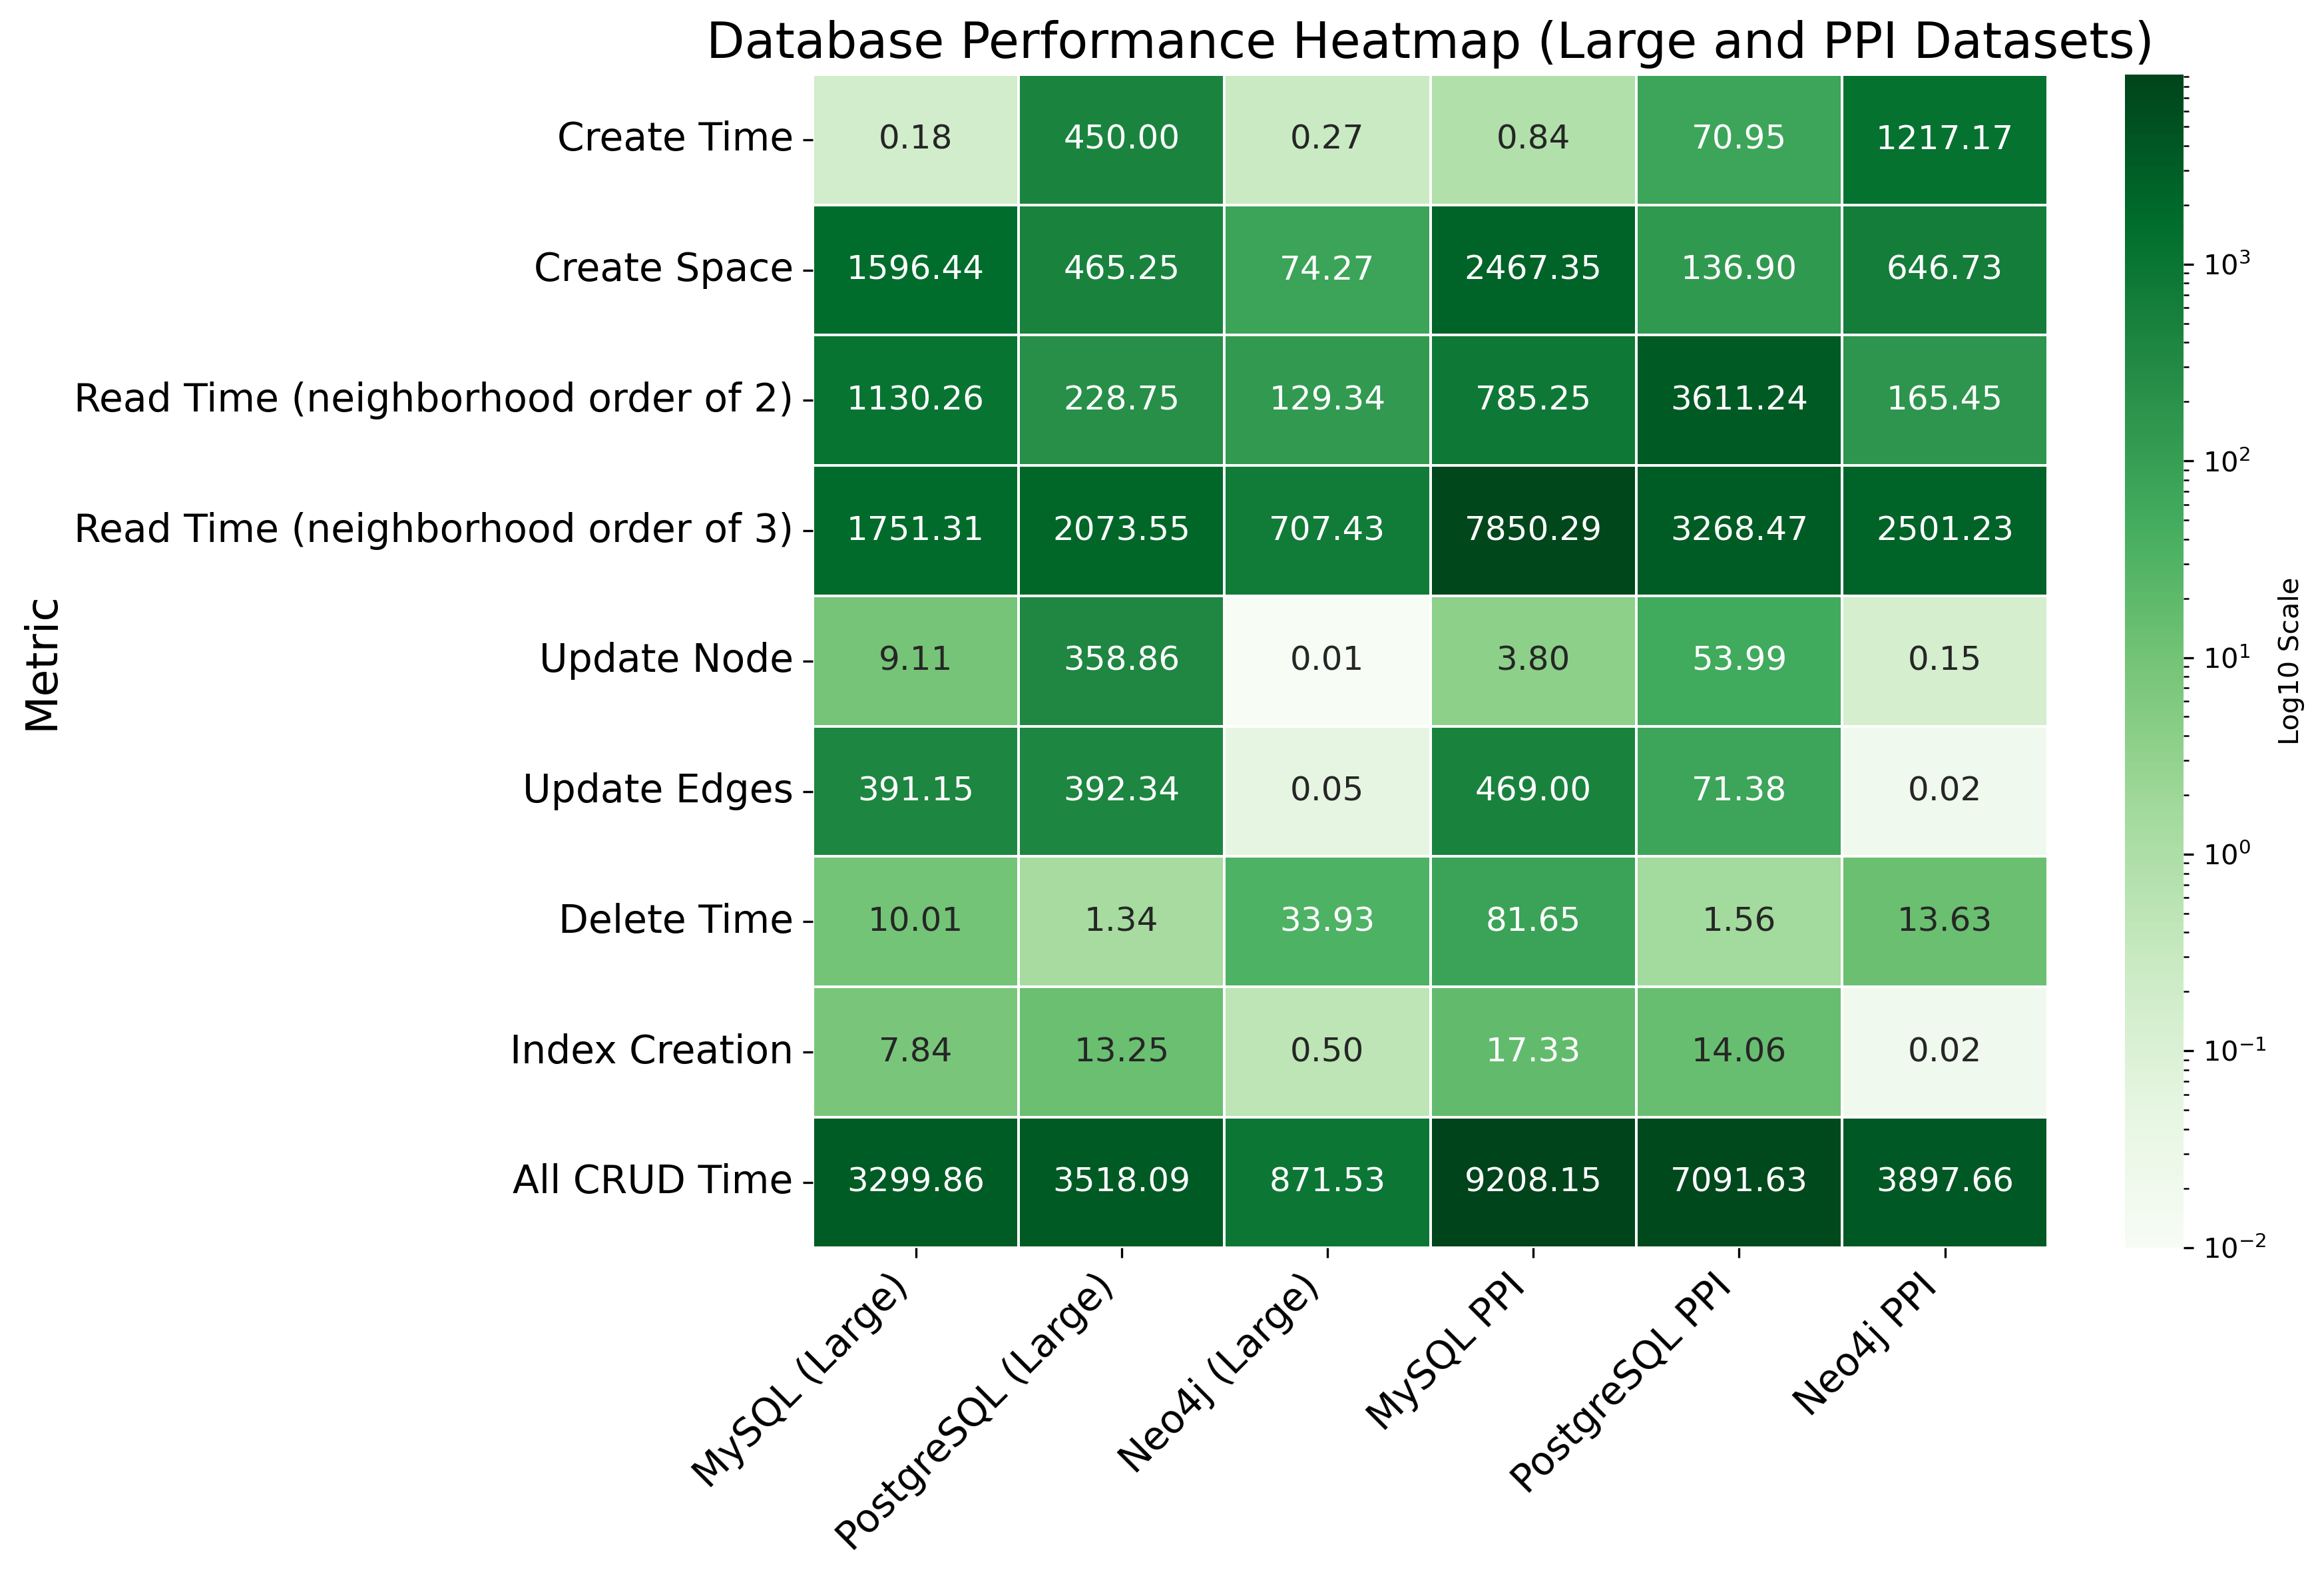

In [1]:
import pandas as pd
import seaborn as sns
import textwrap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Prepare the data
data_small = {
    "Metric": [
        "Create Time",
        "Create Space",
        "Read Time (neighborhood order of 2)",
        "Read Time (neighborhood order of 3)",
        "Update Node",
        "Update Edges",
        "Delete Time",
        "Index Creation",
        "All CRUD Time"
    ],
    "MySQL (Small)": [0.09, 13.04, 11.87, 4.33, 0.12, 0.82, 0.003, 0.380, 17.61],
    "PostgreSQL (Small)": [0.20, 1.67, 0.85, 5.20, 0.90, 0.22, 0.07, 0.07, 7.51],
    "Neo4j (Small)": [0.22, 0.48, 2.64, 4.85, 0.0003, 0.82, 3.00, 0.25, 11.78],
    "MySQL (Medium)": [0.46, 171.09, 192.60, 679.49, 3.12, 15.55, 0.59, 2.91, 894.72],
    "PostgreSQL (Medium)": [2.81, 17.97, 44.47, 92.20, 6.93, 2.32, 0.14, 0.77, 149.64],
    "Neo4j (Medium)": [0.27, 4.91, 23.53, 43.38, 0.0003, 12.07, 4.63, 0.20, 84.08]
}

data_large = {
    "Metric": [
        "Create Time",
        "Create Space",
        "Read Time (neighborhood order of 2)",
        "Read Time (neighborhood order of 3)",
        "Update Node",
        "Update Edges",
        "Delete Time",
        "Index Creation",
        "All CRUD Time"
    ],
    'MySQL (Large)': [0.18, 1596.44, 1130.26, 1751.31, 9.11, 391.15, 10.01, 7.84, 3299.86],
    'PostgreSQL (Large)': [450.00, 465.25, 228.75, 2073.55, 358.86, 392.34, 1.34, 13.25, 3518.09],
    'Neo4j (Large)': [0.27, 74.27, 129.34, 707.43, 0.01, 0.05, 33.93, 0.50, 871.53],
    'MySQL PPI': [0.84, 2467.35, 785.25, 7850.29, 3.80, 469.00, 81.65, 17.33, 9208.15],
    'PostgreSQL PPI': [70.95, 136.90, 3611.24, 3268.47, 53.99, 71.38, 1.56, 14.06, 7091.63],
    'Neo4j PPI': [1217.17, 646.73, 165.45, 2501.23, 0.15, 0.02, 13.63, 0.02, 3897.66]
}

# Create a DataFrame
# df = pd.DataFrame(data_small)
df = pd.DataFrame(data_large)

# Set the index to 'Metric' for better visualization
df.set_index('Metric', inplace=True)

# Set the figure size for high resolution and save image
plt.figure(figsize=(12, 8), dpi=300)  # High resolution with 300 dpi

# Set a better minimum value for visibility of small values
vmin, vmax = df.min().min(), df.max().max()  # Full range of the dataset

# Generate the heatmap with a log scale for the color, but original values as annotations
heatmap = sns.heatmap(df, 
                      cmap='Greens', 
                      norm=LogNorm(vmin=vmin, vmax=vmax),  # Logarithmic color scale
                      annot=True,  # Annotate with original values (seconds)
                      fmt=".2f",  # Format annotations with four decimal places
                      cbar_kws={'label': 'Log10 Scale'},  # Logarithmic scale on color bar
                      linewidths=.5, 
                      annot_kws={"size": 12})


# Set title
# plt.title("Database Performance Heatmap (Small and Medium Datasets)", fontsize=18)
plt.title("Database Performance Heatmap (Large and PPI Datasets)", fontsize=18)

# Adjust the ticks on the x-axis (database and dataset size)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Set x-axis label with increased font size
plt.xlabel("", fontsize=16) 

# Adjust the ticks on the y-axis (metrics)
plt.yticks(rotation=0, fontsize=14)

# Set y-axis label with increased font size
plt.ylabel("Metric", fontsize=16)

# Adjust layout to avoid overlapping of elements
plt.tight_layout()

# Automatically save the image in high resolution
# plt.savefig("db_heatmap_small.png", dpi=300)
plt.savefig("db_heatmap_large.png", dpi=300)

# Show the heatmap
plt.show()
